# Amazon Fine Food Reviews

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

Dataset from Kaggle(https://www.kaggle.com/snap/amazon-fine-food-reviews

## Reviews from Oct 1999 - Oct 2012
- 568,454 reviews
- 256,059 users
- 74,258 products
- 260 users with > 50 reviews

Gensim package for LDA topic modelling and pyLDAvis for visualization of LDA topic model

Another good resource for understanding LDA

https://medium.com/analytics-vidhya/topic-modeling-using-gensim-lda-in-python-48eaa2344920

In [4]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# For visualizations
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt


# Gensim Library
Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Target audience is the natural language processing (NLP) and information retrieval (IR) community.

**Features**

* All algorithms are memory-independent w.r.t. the corpus size (can process input larger than RAM, streamed, out-of-core)

* Intuitive interfaces

* easy to plug in your own input corpus/datastream (simple streaming API)

* asy to extend with other Vector Space algorithms (simple transformation API)

* Efficient multicore implementations of popular algorithms, such as online Latent Semantic Analysis (LSA/LSI/SVD), Latent Dirichlet Allocation (LDA), Random Projections (RP), Hierarchical Dirichlet Process (HDP) or word2vec deep learning.

* Distributed computing: can run Latent Semantic Analysis and Latent Dirichlet Allocation on a cluster of computers.

In [5]:
#!pip install pyLDAvis

In [6]:
data = pd.read_csv("largedata/Reviews.csv")
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
data.shape

(568454, 10)

In [11]:
for i in data.columns:
    print(f'no. of unique {i}, is {data[i].nunique()},')
    print()

no. of unique Id, is 568454,

no. of unique ProductId, is 74258,

no. of unique UserId, is 256059,

no. of unique ProfileName, is 218416,

no. of unique HelpfulnessNumerator, is 231,

no. of unique HelpfulnessDenominator, is 234,

no. of unique Score, is 5,

no. of unique Time, is 3168,

no. of unique Summary, is 295742,

no. of unique Text, is 393579,



In [13]:
data["Score"].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [14]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [15]:

import nltk
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
data.isna().sum().sum()

43

In [17]:
data.dropna(axis = 0, how ='any',inplace=True) 

In [18]:
data.isna().sum().sum()

0

In [19]:
data['Text'] = data['Text'].apply(clean_text)
data['Num_words_text'] = data['Text'].apply(lambda x:len(str(x).split())) 

In [20]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Num_words_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,have bought several vitality canned food produ...,30
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,20
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this confection that been around centuries lig...,52
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe h...,22
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price there wide assortment ...,17


In [22]:
max_review_len  = data['Num_words_text'].max()
max_review_len

2234

### Sampling only short reviews where len is greater than 20 & less than 100

In [24]:
mask = (data['Num_words_text'] < 100) & (data['Num_words_text'] >=20)
data_sr = data[mask]
data_sr.shape

(373281, 11)

In [25]:
data_sr.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Num_words_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,have bought several vitality canned food produ...,30
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,20
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this confection that been around centuries lig...,52
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe h...,22
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,wild hair taffy ordered this five pound taffy ...,43


In [35]:
data_sr[["Score"]].groupby("Score").value_counts()

Score
1     36230
2     20910
3     29080
4     53413
5    233648
dtype: int64

In [36]:
data_sr["Score"].value_counts()

5    233648
4     53413
1     36230
3     29080
2     20910
Name: Score, dtype: int64

In [37]:
data_sampled = data_sr.groupby('Score').apply(lambda x: x.sample(n=20000)).reset_index(drop = True)

data_sampled.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Num_words_text
0,321929,B000LKU4VE,A21XAQ9670N7EV,sage,1,4,1,1225843200,Not even close,decided that this could have word cheddar incl...,77
1,19803,B0030VBRIU,A2PZQZKGAOYF76,"Amy L. Shorter ""AmyLynnB17""",2,3,1,1318291200,*** CHOKING HAZARD ***,love happy baby products cereals puffs yogurt ...,37
2,237487,B0030H1WW0,A14EW4N6O2M6IM,Peek_Inside_Books,0,0,1,1291420800,Yuck!,wheres logic here machine brew instant coffee ...,68
3,372101,B001DP4TRQ,AI19H9NRP9B5F,"SES51 ""Steve""",0,0,1,1327017600,Opinion: Sweet Kerosene Flavor,sodastream diet fountain mist flavor smells li...,55
4,169558,B001397WV2,AOMO31D8U3OPH,joyce sineni,3,5,1,1277424000,My two cats hated it.,cats like this stuff thought would treat them ...,42


In [38]:
data_sampled.shape

(100000, 11)

In [40]:
data_sampled["Score"].value_counts()

1    20000
2    20000
3    20000
4    20000
5    20000
Name: Score, dtype: int64

## Preprocess the Data

### Removing the stopwords

In [42]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
data_sampled['Text']=data_sampled['Text'].apply(remove_stopwords)

In [45]:
data_sampled.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Num_words_text
0,321929,B000LKU4VE,A21XAQ9670N7EV,sage,1,4,1,1225843200,Not even close,decided could word cheddar included packaging ...,77
1,19803,B0030VBRIU,A2PZQZKGAOYF76,"Amy L. Shorter ""AmyLynnB17""",2,3,1,1318291200,*** CHOKING HAZARD ***,love happy baby products cereals puffs yogurt ...,37
2,237487,B0030H1WW0,A14EW4N6O2M6IM,Peek_Inside_Books,0,0,1,1291420800,Yuck!,wheres logic machine brew instant coffee thoug...,68
3,372101,B001DP4TRQ,AI19H9NRP9B5F,"SES51 ""Steve""",0,0,1,1327017600,Opinion: Sweet Kerosene Flavor,sodastream diet fountain mist flavor smells li...,55
4,169558,B001397WV2,AOMO31D8U3OPH,joyce sineni,3,5,1,1277424000,My two cats hated it.,cats like stuff thought would treat pricey org...,42


In [44]:
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
    output = []
    for sent in texts:
        doc = nlp(sent) 
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
    return output

In [46]:
text_list=data_sampled['Text'].tolist()
print(text_list[1])


love happy baby products cereals puffs yogurt melts baby food except gobble gobble even year choked really ticked year choked extremely thick lumpy cannot believe happy baby manufacturers sells stuff cant believe retailers stock


In [47]:
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

['happy', 'baby', 'product', 'cereal', 'yogurt', 'baby', 'food', 'gobble', 'year', 'year', 'thick', 'lumpy', 'happy', 'baby', 'manufacturer', 'stuff', 'retailer']


In [48]:

print(tokenized_reviews[5])

['love', 'artichoke', 'heart', 'dish', 'awful', 'texture', 'gritty', 'awful', 'can', 'friend', 'nasty', 'waste', 'time', 'money']



## Create vocabulary dictionary and document term matrix

In [49]:
# Every row is a document
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [50]:
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 2),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1)],
 [(13, 1),
  (16, 1),
  (22, 2),
  (23, 3),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 2),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1)],
 [(19, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 3),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 2),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1)],
 [(5, 1),
  (38, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 3),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 2),
  (71, 1),
  (72, 1),
  (73, 1)],
 [(16, 1),
  (25, 1),
  (74, 1),
  (75, 2),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83,

In [52]:
len(doc_term_matrix)

100000

In [54]:
type(dictionary)

gensim.corpora.dictionary.Dictionary

In [58]:
print(dictionary)

Dictionary<34402 unique tokens: ['allergy', 'bear', 'cheddar', 'cheese', 'child']...>


In [68]:
# Getting the keys of dictionary that is the vocab
dictionary.token2id.keys()

dict_keys(['allergy', 'bear', 'cheddar', 'cheese', 'child', 'close', 'dairy', 'free', 'margarine', 'milk', 'noodle', 'packaging', 'place', 'product', 'resemblance', 'slice', 'stuff', 'substitute', 'substitution', 'time', 'wheat', 'wheatbased', 'year', 'baby', 'cereal', 'food', 'gobble', 'happy', 'lumpy', 'manufacturer', 'retailer', 'thick', 'yogurt', 'availble', 'brew', 'check', 'cocoa', 'coffee', 'cost', 'cup', 'difference', 'few', 'froth', 'heart', 'instant', 'liberal', 'logic', 'machine', 'next', 'nice', 'policy', 'powder', 'price', 'return', 'site', 'store', 'suggestion', 'surprised', 'thought', 'unit', 'well', 'avoid', 'believe', 'cleaning', 'comparable', 'diet', 'flavor', 'fluid', 'kerosene', 'list', 'mist', 'mountain', 'real', 'taste', 'bowl', 'cat', 'dressing', 'fishy', 'good', 'great', 'organic', 'pricey', 'right', 'smell', 'thumb', 'artichoke', 'awful', 'can', 'dish', 'friend', 'gritty', 'love', 'money', 'nasty', 'texture', 'waste', 'blueberry', 'desperate', 'fake', 'gross', 

In [72]:
list(dictionary.token2id.keys())[:10]

['allergy',
 'bear',
 'cheddar',
 'cheese',
 'child',
 'close',
 'dairy',
 'free',
 'margarine',
 'milk']

# Building the LDA model

In [73]:
# Vreating the object for LDA model using gensim library
# Chunks for 1000 documents in each iteration
# 100 iterations 
LDA = gensim.models.ldamodel.LdaModel
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics = 10,random_state=101,
               chunksize=1000, passes = 50, iterations=100)

**Maximum Number of Passes over the Data**

For best results, Amazon ML may need to make multiple passes over your data to discover patterns. By default, Amazon ML makes 10 passes, but you can change the default by setting a number up to 100. Amazon ML keeps track of the quality of patterns (model convergence) as it goes along, and automatically stops the training when there are no more data points or patterns to discover. For example, if you set the number of passes to 20, but Amazon ML discovers that no new patterns can be found by the end of 15 passes, then it will stop the training at 15 passes.

In general, data sets with only a few observations typically require more passes over the data to obtain higher model quality. Larger data sets often contain many similar data points, which eliminates the need for a large number of passes. The impact of choosing more data passes over your data is two-fold: model training takes longer, and it costs more.

https://radimrehurek.com/gensim/models/ldamodel.html

https://docs.aws.amazon.com/machine-learning/latest/dg/training-parameters1.html

### For 10 Topics

In [74]:
# For 10 topics
lda_model.print_topics()

[(0,
  '0.022*"time" + 0.018*"product" + 0.016*"morning" + 0.014*"great" + 0.013*"good" + 0.012*"light" + 0.012*"energy" + 0.011*"work" + 0.011*"little" + 0.010*"weight"'),
 (1,
  '0.054*"sugar" + 0.054*"snack" + 0.049*"chip" + 0.031*"good" + 0.030*"healthy" + 0.030*"great" + 0.028*"milk" + 0.025*"sweet" + 0.022*"cereal" + 0.022*"protein"'),
 (2,
  '0.051*"rice" + 0.043*"cheese" + 0.041*"popcorn" + 0.030*"meal" + 0.029*"cracker" + 0.023*"bone" + 0.021*"flour" + 0.018*"puppy" + 0.017*"wheat" + 0.016*"list"'),
 (3,
  '0.053*"store" + 0.050*"product" + 0.049*"price" + 0.029*"good" + 0.025*"great" + 0.023*"local" + 0.018*"grocery" + 0.017*"butter" + 0.016*"order" + 0.015*"peanut"'),
 (4,
  '0.033*"good" + 0.032*"flavor" + 0.026*"salt" + 0.024*"sauce" + 0.016*"great" + 0.014*"little" + 0.014*"chicken" + 0.013*"soup" + 0.011*"variety" + 0.011*"taste"'),
 (5,
  '0.047*"chocolate" + 0.047*"flavor" + 0.030*"good" + 0.021*"taste" + 0.020*"bar" + 0.018*"candy" + 0.017*"sweet" + 0.016*"love" + 0.0

In [76]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()


In [90]:
#!pip install pandas==3.4.1

In [89]:
#vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)


In [87]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)

In [88]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.111858 -0.173265       1        1  13.809711
6     -0.072491 -0.204289       2        1  12.681327
5     -0.071836  0.171273       3        1  11.764929
0     -0.024485 -0.170711       4        1  10.919541
9     -0.098702  0.145941       5        1  10.808754
8     -0.051521  0.154019       6        1   9.679301
4     -0.071558  0.068087       7        1   9.628220
7     -0.019002 -0.138179       8        1   9.353377
1      0.051694  0.168855       9        1   7.854985
2      0.469759 -0.021732      10        1   3.499855, topic_info=           Term          Freq         Total Category  logprob  loglift
37       coffee  28939.000000  28939.000000  Default  30.0000  30.0000
25         food  22679.000000  22679.000000  Default  29.0000  29.0000
55        store  13783.000000  13783.000000  Default  28.0000  28.0000
66       flavor  31938.000000  31938.000000  Default  27.0000  27.0000
391   chocolate  10518.000000  10518.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
556        glad    625.321416   1370.344371  Topic10  -4.6623   2.5679
74         bowl    598.845158   1368.198184  Topic10  -4.7056   2.5262
390     calorie    730.860532   5331.277745  Topic10  -4.5064   1.3653
356        easy    577.308409   5369.055309  Topic10  -4.7422   1.1224
1529    perfect    557.558573   6843.388773  Topic10  -4.7770   0.8450

[545 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1816      9  0.999119       acid
919       4  0.999459  afternoon
1159      8  0.998210   allergic
0         1  0.284014    allergy
0         4  0.715064    allergy
...     ...       ...        ...
22        5  0.044813       year
22        7  0.046901       year
22        8  0.245642       year
32       10  0.999357     yogurt
1088      7  0.999739      yummy

[821 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 6, 1, 10, 9, 5, 8, 2, 3])

In [91]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.498724169649956

Coherence Score:  0.43947932411616125



Method to find optimal number of topics Code from:https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#14computemodelperplexityandcoherencescore

In [92]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [93]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)


In [99]:
model_list, coherence_values

([<gensim.models.ldamodel.LdaModel at 0x1cebf59eef0>,
 [0.3229141459985317,
  0.35905123846181014,
  0.42056286430941114,
  0.4542286106544625,
  0.42708003595555794,
  0.4418019716381864,
  0.4579308182332368,
  0.4303058942476159,
  0.43689229950799396,
  0.42582317151105403,
  0.447936593910238,
  0.4165991246914667,
  0.42360031538573134,
  0.4205256263162733,
  0.40196846820849286,
  0.42583593619253113,
  0.4194561379106266,
  0.41090050469317985,
  0.4172784983371442,
  0.4047367455122755,
  0.38224960643221967,
  0.3991229274486621,
  0.3819372979549403,
  0.40248656873540595,
  0.3764130239980029,
  0.3722306894392316,
  0.37860934333599017,
  0.3893062254539586,
  0.37098932300453197,
  0.3715025532234623,
  0.3641572040625425,
  0.3689518103341916,
  0.3731629182337565,
  0.35352094314319243,
  0.35891104731178924,
  0.351174468096498,
  0.34862540018544946,
  0.3446375447743441,
  0.33668810545254146,
  0.33172006062748893,
  0.33740296187917185,
  0.3446855489087884,
  0.3

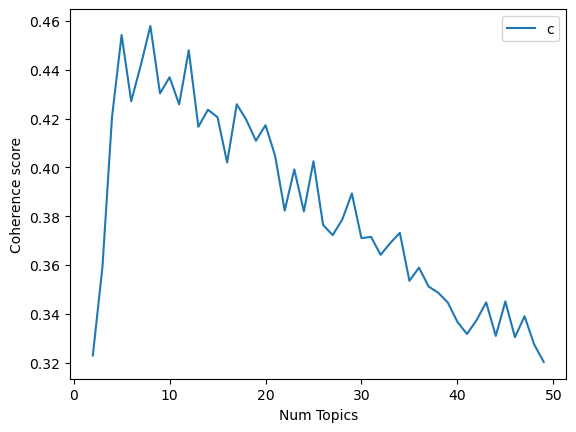

In [94]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [95]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3229
Num Topics = 3  has Coherence Value of 0.3591
Num Topics = 4  has Coherence Value of 0.4206
Num Topics = 5  has Coherence Value of 0.4542
Num Topics = 6  has Coherence Value of 0.4271
Num Topics = 7  has Coherence Value of 0.4418
Num Topics = 8  has Coherence Value of 0.4579
Num Topics = 9  has Coherence Value of 0.4303
Num Topics = 10  has Coherence Value of 0.4369
Num Topics = 11  has Coherence Value of 0.4258
Num Topics = 12  has Coherence Value of 0.4479
Num Topics = 13  has Coherence Value of 0.4166
Num Topics = 14  has Coherence Value of 0.4236
Num Topics = 15  has Coherence Value of 0.4205
Num Topics = 16  has Coherence Value of 0.402
Num Topics = 17  has Coherence Value of 0.4258
Num Topics = 18  has Coherence Value of 0.4195
Num Topics = 19  has Coherence Value of 0.4109
Num Topics = 20  has Coherence Value of 0.4173
Num Topics = 21  has Coherence Value of 0.4047
Num Topics = 22  has Coherence Value of 0.3822
Num Topics = 23  has C

In [100]:
# Select the model and print the topics
optimal_model = model_list[6]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.034*"good" + 0.023*"snack" + 0.023*"flavor" + 0.020*"great" + 0.016*"cookie" + 0.013*"taste" + 0.013*"chocolate" + 0.013*"healthy" + 0.011*"sweet" + 0.011*"bar"'),
 (1,
  '0.030*"treat" + 0.027*"chip" + 0.020*"small" + 0.019*"size" + 0.018*"dog" + 0.016*"good" + 0.014*"great" + 0.013*"little" + 0.012*"time" + 0.012*"bean"'),
 (2,
  '0.053*"water" + 0.030*"bottle" + 0.022*"coconut" + 0.019*"product" + 0.016*"sauce" + 0.014*"packet" + 0.013*"milk" + 0.012*"container" + 0.009*"plastic" + 0.009*"time"'),
 (3,
  '0.042*"flavor" + 0.031*"taste" + 0.030*"good" + 0.019*"salt" + 0.018*"great" + 0.012*"bread" + 0.011*"drink" + 0.011*"energy" + 0.010*"spice" + 0.010*"little"'),
 (4,
  '0.102*"food" + 0.022*"product" + 0.021*"cat" + 0.018*"butter" + 0.017*"peanut" + 0.016*"dog" + 0.016*"good" + 0.015*"year" + 0.013*"baby" + 0.012*"month"'),
 (5,
  '0.035*"product" + 0.035*"store" + 0.033*"price" + 0.026*"good" + 0.024*"great" + 0.020*"time" + 0.016*"order" + 0.015*"local" + 0.014*"year" 

In [101]:
lda_viz = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)

In [102]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.111858 -0.173265       1        1  13.810710
6     -0.072491 -0.204289       2        1  12.680618
5     -0.071836  0.171273       3        1  11.767985
0     -0.024485 -0.170711       4        1  10.917750
9     -0.098702  0.145941       5        1  10.809423
8     -0.051521  0.154019       6        1   9.678472
4     -0.071558  0.068087       7        1   9.628098
7     -0.019002 -0.138179       8        1   9.354551
1      0.051694  0.168855       9        1   7.853033
2      0.469759 -0.021732      10        1   3.499360, topic_info=           Term          Freq         Total Category  logprob  loglift
37       coffee  28941.000000  28941.000000  Default  30.0000  30.0000
25         food  22682.000000  22682.000000  Default  29.0000  29.0000
55        store  13784.000000  13784.000000  Default  28.0000  28.0000
66       flavor  31941.000000  31941.000000  Default  27.0000  27.0000
391   chocolate  10521.000000  10521.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
556        glad    625.233066   1370.367077  Topic10  -4.6623   2.5679
74         bowl    598.760549   1368.161112  Topic10  -4.7056   2.5262
390     calorie    730.757270   5331.354815  Topic10  -4.5064   1.3653
356        easy    577.226843   5368.514506  Topic10  -4.7422   1.1225
1529    perfect    557.479797   6842.709984  Topic10  -4.7770   0.8451

[545 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1816      9  0.997566       acid
919       4  0.998456  afternoon
1159      8  0.998085   allergic
0         1  0.284041    allergy
0         4  0.715133    allergy
...     ...       ...        ...
22        5  0.044811       year
22        7  0.046900       year
22        8  0.245636       year
32       10  0.999498     yogurt
1088      7  0.999752      yummy

[821 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 6, 1, 10, 9, 5, 8, 2, 3])